<a href="https://colab.research.google.com/github/Harshpatel44/Softmax-classifier-Network/blob/master/softmax-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Functions used

In [0]:
def single_from_one_hot(z):
    return np.argmax(z,axis=1)

In [0]:
def plot_decision(obj,X,numOutputs):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    ar=np.array([xx.ravel(), yy.ravel()])   
    for i in range(numOutputs+1):   # adding column for bias and label for consistency
      ar=np.append(ar,np.zeros((1,ar.shape[1]))+1,axis=0)
    z = obj.predict(ar.T,1)
    z = z[:,0].reshape(xx.shape)
    plt.contourf(xx,yy,z)
    plt.scatter(X[:,0],X[:,1],c=X[:,-1])
    plt.show()

In [0]:
def train_test_split(data,tr_percent,te_percent):
    n=np.round((data.shape[0] * tr_percent) / 100)
    return data[0:int(n),:-1],data[0:int(n),-1],data[int(n):,:-1],data[int(n):,-1]

In [0]:
def one_hot_encoding(X,classes):
  one_hot_X=np.zeros((X.shape[0],classes))
  one_hot_X[range(X.shape[0]),np.array(X[:,-1],dtype='int8')] = 1
  X=np.array(X[:,:-1])
  X=np.append(X,one_hot_X,axis=1)
  return X

# Ek Naya Daur

In [0]:
import time
from sklearn import datasets,decomposition
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
mnist = datasets.fetch_openml('mnist_784')

Declaration

In [0]:
train = mnist.data[:60000,:]
test =  mnist.data[60000:,:]
train_y = mnist.target[:60000]
test_y =  mnist.target[60000:]


train_y=train_y.reshape((train_y.shape[0],1))
test_y=test_y.reshape((test_y.shape[0],1))
train_y= np.array(train_y,dtype="float32")
test_y= np.array(test_y,dtype="float32")


train_y=one_hot_encoding(train_y,10)
test_y=one_hot_encoding(test_y,10)
#train=np.clip(train,0,1)
#test=np.clip(test,0,1)

Using PCA for feature selection

In [176]:
pca=decomposition.PCA(.50)
pca.fit(train)
pca_train=pca.transform(train)
pca_test=pca.transform(test)
print(np.max(pca_train))
print(np.min(pca_train))

2363.3240553736114
-1507.4220234416862


Standard scaling

In [159]:
ss=StandardScaler()
ss.fit(pca_train)
ss_train=ss.transform(pca_train)
ss_test=ss.transform(pca_test)
print(np.max(ss_train))
print(np.min(ss_train))

4.864449151944299
-3.666963630799203


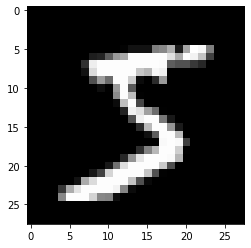

In [158]:
plt.imshow(train[0].reshape(28,28), cmap='gray', interpolation='none')

In [0]:
def plot_variances(digits,labels,iteration=3,tight=1):
  fig = plt.figure()
  for i in range(iteration):
    plt.subplot(3,3,i+1)
    if(tight==1):
      plt.tight_layout()
    try:
      plt.imshow(np.reshape(digits,(60000,28,28))[i], cmap='gray', interpolation='none')
    except:
      plt.imshow(np.reshape(digits,(10000,28,28))[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(labels[i]))
    plt.xticks([])
    plt.yticks([])

In [0]:
from numpy.random import default_rng
rng = default_rng()
np.random.seed(0)

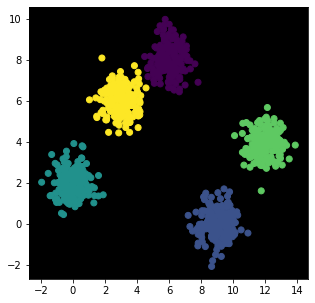

(900, 5)


In [172]:
class data_set1:
  
  def __init__(self):
    self.cov1= [[0,0],[0,0]]  #covariance for class1
    self.cov2=[[0,0],[0,0]]   #covariance for class2   
    
    # method to adjust noise
  def noise(self,amt1,amt2=0):             
    n1=(3.5 - 0.4)*(amt1) + 0.4  #3.5 is max covariance and 0.4 is min covariance taken for noise
    self.cov1=[[n1,0],[0,n1]]
    if(amt2==0):
      amt2=amt1
    n2=(3.5 - 0.4)*(amt2) + 0.4
    self.cov2=[[n2,0],[0,n2]]
  #method to create data
  def create(self,n=2,items=100,noise=0):
    self.noise(noise,noise)
    self.n= n
    
    self.items= int(np.round(items/n))    # items per class =  all items / n 
    mx = rng.choice(int(self.n), size=self.n, replace=False)  # random x value of mean 
    my = rng.choice(int(self.n), size=self.n, replace=False)  # random y value of mean
    for i in range(self.n):
        if(i==0):
          x1, y1 = np.random.multivariate_normal([mx[i]*3,my[i]*2], self.cov1, self.items).T  #class1
          self.d1_data = np.array([x1,y1,np.zeros(x1.shape)+i])
        else:
          x2, y2 = np.random.multivariate_normal([mx[i]*3,my[i]*2], self.cov2, self.items).T  #class2
          self.d1_data=np.append(self.d1_data,[x2,y2,np.zeros(x1.shape)+i],axis=1)
    #appending both classes to 1 array and also adding another column of labels
    self.d1_data=self.d1_data.T
    return self.d1_data
  def plot(self):
    plt.figure(figsize=(5,5))
    plt.scatter(self.d1_data[:,0],self.d1_data[:,1],c=self.d1_data[:,2])
    
    ax = plt.gca()
    ax.set_facecolor('xkcd:salmon')
    ax.set_facecolor((0, 0, 0))
    #plt.axis([-6,6,-6,6])
    plt.show()

obj1=data_set1()
X=obj1.create(5,1000,0.00)   #class,items,noise
np.random.shuffle(X)
obj1.plot()
train=X[:,:-1]
train_y=X[:,-1]
train,train_y,test,test_y=train_test_split(X,90,10)
train_y=train_y.reshape(train_y.shape[0],1)
test_y=test_y.reshape(test_y.shape[0],1)
train_y=one_hot_encoding(train_y,5)
test_y=one_hot_encoding(test_y,5)
print(train_y.shape)

Feedforward net

677379.3187076411
677379.3187076411
581076.9158626456
138484.06092459426
138439.33667132212
138399.33958043926
138363.58348863627
138331.63056530087
138303.0866732876
138277.5971686214
138254.84309470688
138234.53773226112
138216.4234708627
138200.26897190372
138185.8665960188
138173.0300708546
138161.59237744345
138151.40383552475
138142.3303699754
138134.25194212332
138127.0611311445
138120.66185203296
138114.96819778837
138109.90339452313
138105.39885914745
138101.3933501709
138097.83220296592
138094.66664157918
138091.8531598597
138089.35296530294
138087.1314795872
138085.15789031525
138083.40474896322
138081.8476104943
138080.46471050757
138079.2366761767
138078.14626758083
138077.17814635352
138076.318668867
138075.55570143636
138074.87845527567
138074.2773391559
138073.74382792236
138073.27034520847
138072.85015885136
138072.47728766908
138072.14641838858
138071.852831646
138071.59233608624
138071.36120969112
138071.15614755906
138070.97421543705
138070.81280838064
138070.669613

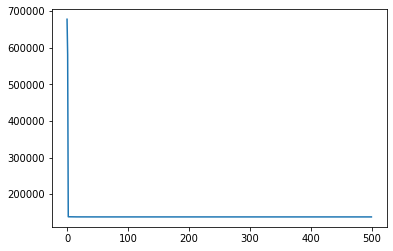

[0.09871667 0.11236667 0.0993     0.10218333 0.09736667 0.09035
 0.09863333 0.10441667 0.09751667 0.09915   ]
[1 1 1 ... 1 1 1]
[7 2 1 ... 4 5 6]
0.1135


In [183]:
class Model():
    def __init__(self):
        self.hidden_units=4
        self.learning_rate=0.00001
        self.output_classes=10
        
    def init_weights(self):
        self.w1=np.random.random_sample((self.train.shape[1],self.hidden_units))
        
        self.b1=np.zeros((1,self.hidden_units))+1
        self.w2=np.random.random_sample((self.hidden_units,self.hidden_units))
        
        self.b2=np.zeros((1,self.hidden_units))+1
        
        self.w3=np.random.random_sample((self.hidden_units,self.output_classes))
        self.b3=np.zeros((1,self.output_classes))+1

    def cross_entropy_loss(self,y,t):
        return -np.sum(t * np.log(y+0.00000001))

    def mse_loss(self,y,t):
        return np.sum(0.5 * np.power(y - t,2))

    def activ(self,z,n):
        if n=='relu':
          return np.maximum(0,z)  
          
        if n=='softmax':
          t=np.exp(z - np.max(z,axis=1,keepdims=True) )/np.sum(np.exp(z - np.max(z,axis=1,keepdims=True) ),axis=1,keepdims=True)
          return t
          #return np.exp(z)/np.sum(np.exp(z))

    def deriv_activ(self,z,n='r'):
        if(n=="r"):
            return np.where(z>0,1,0)

    def train_model(self,train,train_y):
        self.train=train
        self.train_y=train_y
        self.init_weights()
        train_loss=[]
        for i in range(500):
            #print()
            #feedforward propogation
            # a=time.time()
            #print(np.max(self.train))
            #print(np.max(self.w1))
            #print(self.w1[[0]])
            #print(self.b1[0])            
            h1=self.activ(np.dot(self.train,self.w1)+self.b1,'relu')
            #print('h1:',h1)
            h2=self.activ(np.dot(h1,self.w2)+self.b2,'relu')
            #print('h2:',h2)
            y=self.activ(np.dot(h2,self.w3)+self.b3,'softmax')
            #print('y:',y)
            
            # b=time.time()
            # print("feedforward_time:",b-a)

            l=self.cross_entropy_loss(y,self.train_y)
            print(l)
    
            if(i%500==0):
              l=self.cross_entropy_loss(y,self.train_y)
              print(l)
            train_loss.append(l)

            # derivative for softmax and cross entropy loss together
            dl = y - self.train_y                             # [60k x 10]
            
            #print(dl)
            #input()
            
            #a=time.time()
            #w3/dl
            w3_ = np.dot(h2.T,dl)                        # [5 x 60k] x [60k x 10] = [5 x 10] 
            #print(w3_[0:4])
            b3_ = np.sum(dl,axis=0,keepdims=True)
           
            #w2/dl
            dz3_=np.dot(dl,self.w3.T)                    # [60k x 10] x [10 x 5] = [60k x 5]
            dh2_=np.multiply(dz3_,self.deriv_activ(h2))  # [60k x 5] * [60 x 5]  = [60k x 5]
            w2_=np.dot(h1.T,dh2_)                        # [5 X 60k] x [60k x 5] = [5 x 5]
            b2_=np.sum(dh2_,axis=0,keepdims=True)
            #w1/dl
            dz2_=np.dot(dh2_,self.w2.T)                   # [60k x 5] x [5 x 5] = [60k x 5]
            dh1_ =np.multiply(dz2_,self.deriv_activ(h1))  # [60k x 5] * [60k x 5] = [60k x 5]
            w1_=np.dot(self.train.T,dh1_)                 # [784 x 60k] * [60k x 5] = [784 x 5]
            b1_=np.sum(dh2_,axis=0,keepdims=True)

            # b=time.time()
            # print("backpropogation_time:",b-a)
            
            #a=time.time()
            #w3_=np.clip(w3_,-1000,1000)
            #w2_=np.clip(w2_,-1000,1000)
            #w1_=np.clip(w1_,-1000,1000)
            # w3_ += 1e-03 * w3_
            # w2_ += 1e-03 * w2_
            # w1_ += 1e-03 * w1_
            self.w3+= (-self.learning_rate * w3_)
            self.w2+= (-self.learning_rate * w2_)
            self.w1+= (-self.learning_rate * w1_)
            
            # b3_=np.clip(b3_,-100,100)
            # b2_=np.clip(b2_,-100,100)
            # b1_=np.clip(b1_,-100,100)
            self.b3+= (-self.learning_rate * b3_)
            self.b2+= (-self.learning_rate * b2_)
            self.b1+= (-self.learning_rate * b1_)
            # b=time.time()
            # print("updation_time:",b-a)
        #del h1,h2,y,l
        return train_loss 
    def test_model(self,test,test_y):
        h1=self.activ(np.dot(test,self.w1)+self.b1,'relu')
        h2=self.activ(np.dot(h1,self.w2)+self.b2,'relu')
        y=self.activ(np.dot(h2,self.w3)+self.b3,'softmax')
        
        l=self.cross_entropy_loss(y,test_y)
        print(y[0])
        print(np.argmax(y,axis=1))
        print(np.argmax(test_y,axis=1))
        return l,np.mean(np.argmax(y,axis=1)==np.argmax(test_y,axis=1))

net=Model()
training_loss=net.train_model(pca_train,train_y)
plt.plot(training_loss)
plt.show()
loss,accuracy=net.test_model(pca_test,test_y)
print(accuracy)